# Analysis

**Hypothesis**: We hypothesize that severe COVID-19 perturbs the proliferative dynamics of specific immune cell subsets, particularly CD4 T, CD8 T, and plasmablast (PB) cells, by altering their cell cycle phase distributions. In COVID-19 patients, we expect an abnormal increase in the proportion of cells in the S and G2/M phases, compared to healthy controls, indicative of dysregulated cell cycle progression and potential immune dysfunction.

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Set up visualization defaults for better plots
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figsize = (8, 8)
sc.settings.dpi = 100
sc.settings.facecolor = 'white'
warnings.filterwarnings('ignore')

# Set Matplotlib and Seaborn styles for better visualization
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['savefig.dpi'] = 150
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2)

# Load data
print("Loading data...")
adata = sc.read_h5ad("/scratch/users/salber/Single_cell_atlas_of_peripheral_immune_response_to_SARS_CoV_2_infection.h5ad")
print(f"Data loaded: {adata.shape[0]} cells and {adata.shape[1]} genes")


# Analysis Plan

**Hypothesis**: We hypothesize that severe COVID-19 perturbs the proliferative dynamics of specific immune cell subsets, particularly CD4 T, CD8 T, and plasmablast (PB) cells, by altering their cell cycle phase distributions. In COVID-19 patients, we expect an abnormal increase in the proportion of cells in the S and G2/M phases, compared to healthy controls, indicative of dysregulated cell cycle progression and potential immune dysfunction.

## Steps:
- Perform an exploratory analysis to compute and visualize global cell cycle scores (S and G2/M phases) across all cells using established marker genes.
- Subset the anndata object using adata.obs['cell_type_coarse'] to isolate CD4 T, CD8 T, and PB cells and further stratify by condition using adata.obs['Status'] (i.e., COVID vs Healthy).
- Apply appropriate statistical tests (e.g., chi-squared or Fisher’s exact test) to compare the distributions of cell cycle phases within each selected cell type between severe COVID-19 and healthy samples.
- Visualize the results using UMAP colored by cell cycle phase and by condition, alongside density plots arranged in a grid layout, ensuring that figures are saved for reproducibility.
- Integrate the statistical test outputs into the visualizations and summarize the findings to link altered proliferative states to immune dysregulation in severe COVID-19.


## Perform an exploratory analysis to compute and visualize global cell cycle scores (S and G2/M phases) across all cells using established marker genes.

calculating cell cycle phase


computing score 'S_score'


    finished: added
    'S_score', score of gene set (adata.obs).
    160 total control genes are used. (0:00:05)


computing score 'G2M_score'


    finished: added
    'G2M_score', score of gene set (adata.obs).
    179 total control genes are used. (0:00:04)


-->     'phase', cell cycle phase (adata.obs)


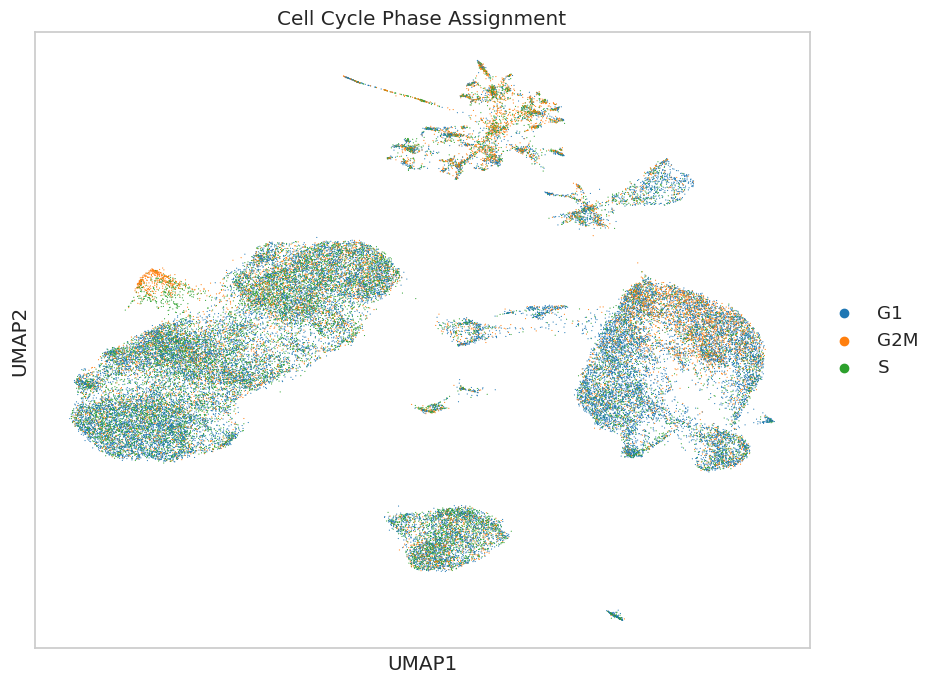

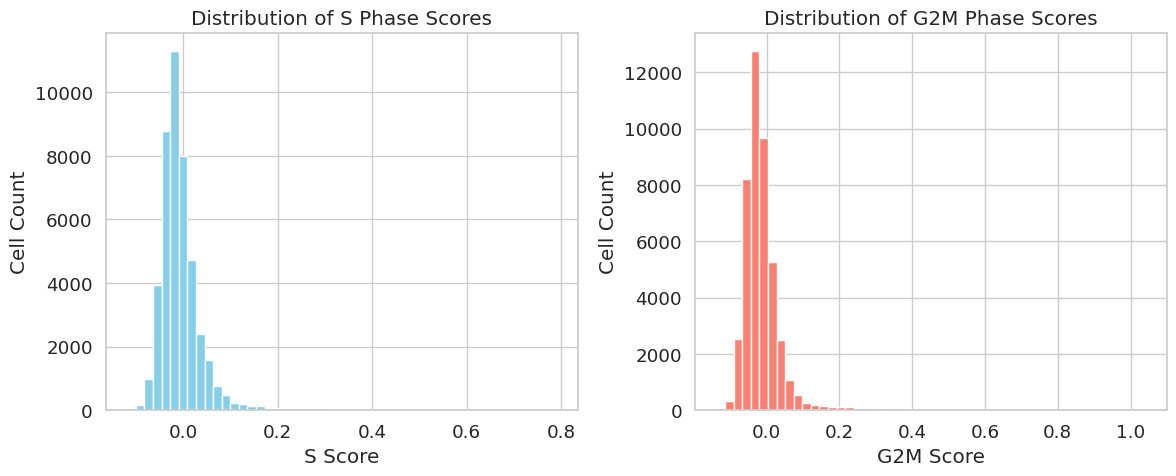

phase
G1     22014
S      12815
G2M     9892
Name: count, dtype: int64


In [2]:
import scanpy as sc
import matplotlib.pyplot as plt

# Define lists of marker genes for S phase and G2/M phase (commonly used in human cell cycle scoring)
# These gene lists are taken from published cell cycle studies
s_genes = ['MCM5', 'PCNA', 'TYMS', 'FEN1', 'MCM2', 'MCM4', 'RRM1', 'UNG', 'GINS2', 'MCM6', 'CDCA7', 'DTL', 'PRIM1', 'UHRF1', 'TIPIN', 'DSCC1', 'BLM', 'CASP8AP2', 'USP1', 'CLSPN']
g2m_genes = ['HMGB2', 'CDK1', 'NUSAP1', 'UBE2C', 'BIRC5', 'TPX2', 'TOP2A', 'NDC80', 'CKS2', 'NUF2', 'CKS1B', 'MKI67', 'TMPO', 'CENPF', 'TACC3', 'NEK2', 'G2E3', 'GAS2L3', 'GREB1L', 'HMMR']

# The anndata object is already loaded as 'adata'
# Compute cell cycle scores. This function will add 'S_score', 'G2M_score', and 'phase' in adata.obs
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

# Basic UMAP visualization colored by cell cycle phase
if 'X_umap' not in adata.obsm.keys():
    sc.pp.neighbors(adata, use_rep='X_pca')  # using PCA representation if available
    sc.tl.umap(adata)

sc.pl.umap(adata, color='phase', title='Cell Cycle Phase Assignment', show=True)

# Additionally, plot the distribution of S and G2M scores as histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(adata.obs['S_score'], bins=50, color='skyblue')
plt.xlabel('S Score')
plt.ylabel('Cell Count')
plt.title('Distribution of S Phase Scores')

plt.subplot(1, 2, 2)
plt.hist(adata.obs['G2M_score'], bins=50, color='salmon')
plt.xlabel('G2M Score')
plt.ylabel('Cell Count')
plt.title('Distribution of G2M Phase Scores')

plt.tight_layout()
plt.show()

# Print a brief summary of cell cycle phase assignment
print(adata.obs['phase'].value_counts())

## Subset the anndata object to include only CD4 T, CD8 T, and plasmablast (PB) cells and implement quality control criteria, such as minimum cell count thresholds, to ensure robust statistical analysis.

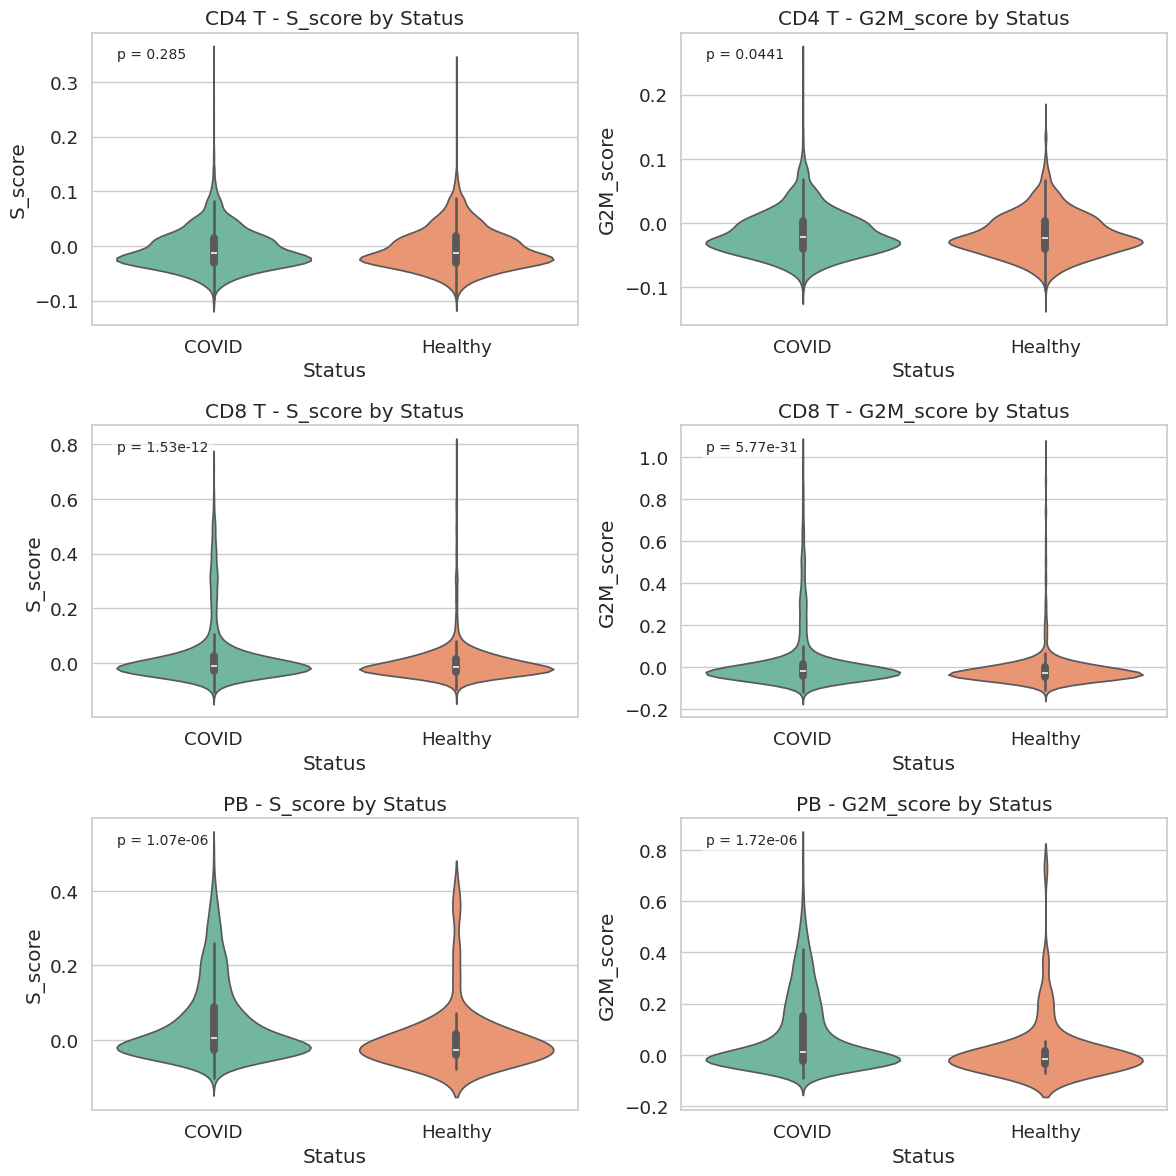

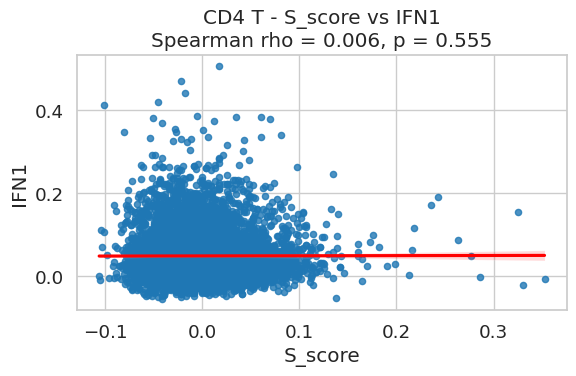

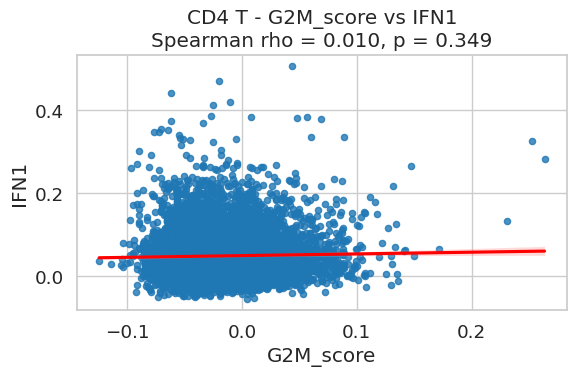

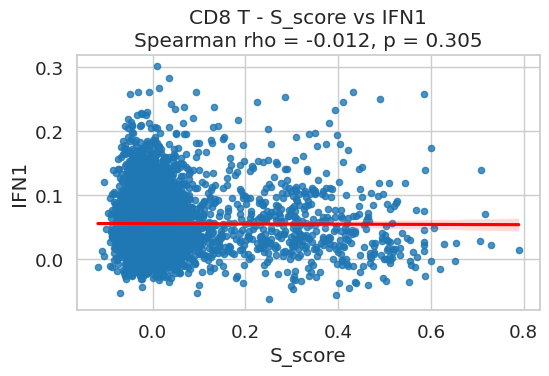

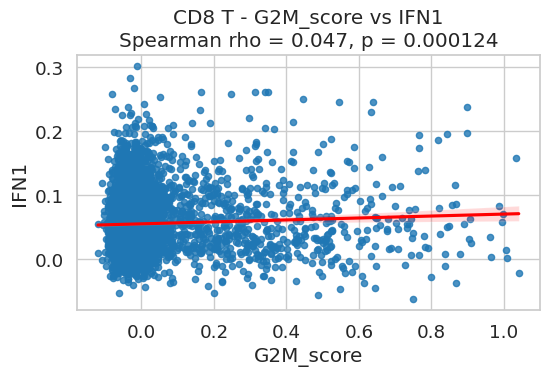

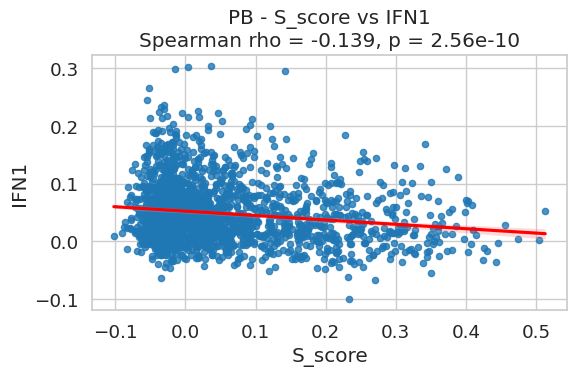

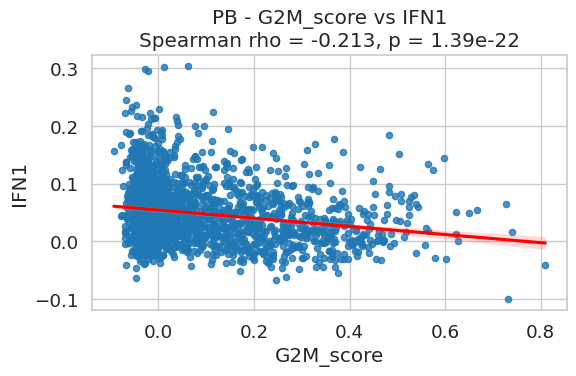

Mann-Whitney U test results:
{'cell_type': 'CD4 T', 'score': 'S_score', 'statistic': 7771738.5, 'p_value': 0.28455916573801865}
{'cell_type': 'CD4 T', 'score': 'G2M_score', 'statistic': 8095587.0, 'p_value': 0.04412107352591313}
{'cell_type': 'CD8 T', 'score': 'S_score', 'statistic': 6153906.0, 'p_value': 1.5335382098581339e-12}
{'cell_type': 'CD8 T', 'score': 'G2M_score', 'statistic': 6511258.5, 'p_value': 5.7693324437159715e-31}
{'cell_type': 'PB', 'score': 'S_score', 'statistic': 111389.0, 'p_value': 1.072229287162927e-06}
{'cell_type': 'PB', 'score': 'G2M_score', 'statistic': 110880.0, 'p_value': 1.720708576359044e-06}
Analysis of cell cycle scores and IFN1 correlations complete.


In [3]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, spearmanr
import json

# Subset the anndata object for relevant cell types: 'CD4 T', 'CD8 T', and 'PB'
subset_types = ['CD4 T', 'CD8 T', 'PB']
adata_subset = adata[adata.obs['cell_type_coarse'].isin(subset_types)].copy()

# A helper function to create violin plots and perform Mann-Whitney U test

def plot_violin(adata_cell, cell_type, score, ax, min_cells=20):
    # Check if the subset has sufficient cells
    if adata_cell.shape[0] < min_cells:
        ax.text(0.5, 0.5, 'Insufficient cells', horizontalalignment='center', verticalalignment='center')
        ax.set_title(f"{cell_type} - {score}")
        return None
    
    # Create the violin plot for the specified score grouped by 'Status'
    sns.violinplot(x='Status', y=score, data=adata_cell.obs, palette='Set2', ax=ax, inner='box')
    ax.set_title(f"{cell_type} - {score} by Status")
    ax.set_xlabel('Status')
    ax.set_ylabel(score)
    
    # Extract score values for COVID and Healthy groups
    covid_scores = adata_cell.obs.loc[adata_cell.obs['Status'] == 'COVID', score].dropna()
    healthy_scores = adata_cell.obs.loc[adata_cell.obs['Status'] == 'Healthy', score].dropna()
    
    # Perform Mann-Whitney U test if both groups have sufficient data
    if len(covid_scores) > 5 and len(healthy_scores) > 5:
        stat, p = mannwhitneyu(covid_scores, healthy_scores, alternative='two-sided')
        ax.text(0.05, 0.95, f'p = {p:.3g}', transform=ax.transAxes, fontsize=10,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
        return {"cell_type": cell_type, "score": score, "statistic": stat, "p_value": p}
    else:
        ax.text(0.05, 0.95, 'Insufficient group data', transform=ax.transAxes, fontsize=10,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
        return None

# Initialize a list to store statistical test results
stats_results = []

# Set up the figure for violin plots (one row per cell type and two columns for S_score and G2M_score)
n_celltypes = len(subset_types)
fig, axes = plt.subplots(n_celltypes, 2, figsize=(12, 4 * n_celltypes), squeeze=False)

# Loop over each cell type and plot the scores
for i, cell_type in enumerate(subset_types):
    # Subset data for this cell type
    adata_cell = adata_subset[adata_subset.obs['cell_type_coarse'] == cell_type]
    for j, score in enumerate(['S_score', 'G2M_score']):
        ax = axes[i, j]
        result = plot_violin(adata_cell, cell_type, score, ax)
        if result is not None:
            stats_results.append(result)

plt.tight_layout()
plt.savefig('cell_cycle_violin_plots.png')
plt.show()

# Correlation analysis between IFN1 expression and cell cycle scores in each selected cell type
correlation_results = []
min_non_nan = 10  # set a minimum number of non-NaN observations required

for cell_type in subset_types:
    adata_cell = adata_subset[adata_subset.obs['cell_type_coarse'] == cell_type]
    if 'IFN1' in adata_cell.obs.columns:
        for score in ['S_score', 'G2M_score']:
            # Ensure sufficient non-NaN data for both features
            valid_idx = adata_cell.obs[[score, 'IFN1']].dropna().index
            if len(valid_idx) >= min_non_nan:
                x = adata_cell.obs.loc[valid_idx, score]
                y = adata_cell.obs.loc[valid_idx, 'IFN1']
                corr_coef, p_corr = spearmanr(x, y, nan_policy='omit')
                correlation_results.append({
                    "cell_type": cell_type,
                    "score": score,
                    "spearman_rho": corr_coef,
                    "p_value": p_corr,
                    "n_cells": len(valid_idx)
                })
                # Create scatterplot with a regression line
                plt.figure(figsize=(6, 4))
                sns.regplot(x=x, y=y, scatter_kws={'s': 20}, line_kws={'color': 'red'})
                plt.title(f"{cell_type} - {score} vs IFN1\nSpearman rho = {corr_coef:.3f}, p = {p_corr:.3g}")
                plt.xlabel(score)
                plt.ylabel('IFN1')
                plt.tight_layout()
                plt.savefig(f'{cell_type}_{score}_IFN1_scatter.png')
                plt.show()
            else:
                print(f"Not enough non-NaN values for correlation analysis in {cell_type} for {score}")
    else:
        print(f"Warning: IFN1 column not found in adata.obs for {cell_type}")

# Print statistical test results from Mann-Whitney U tests
print('Mann-Whitney U test results:')
for res in stats_results:
    print(res)

# Save correlation results to a JSON file
with open('correlation_results.json', 'w') as f:
    json.dump(correlation_results, f, indent=4)

print('Analysis of cell cycle scores and IFN1 correlations complete.')

## Subset the anndata object for CD8 T cells and plasmablasts (PB) from COVID-19 patients only, explicitly excluding healthy and non-applicable individuals. Note a threshold of at least 10 cells overall for a correlation test and at least 5 cells per ventilation group for Mann–Whitney U tests.

Cell counts for selected types in COVID-19:
cell_type_coarse
CD8 T    3877
PB       1977
Name: count, dtype: int64



Analyzing CD8 T (n = 3877)


CD8 T - S_score by Ventilation: Mann-Whitney U statistic = 1444691.500, p = 0.601 (NonVent n = 1024, Vent n = 2853)
CD8 T - G2M_score by Ventilation: Mann-Whitney U statistic = 1489585.000, p = 0.348 (NonVent n = 1024, Vent n = 2853)



Analyzing PB (n = 1977)


PB - S_score by Ventilation: Mann-Whitney U statistic = 303749.500, p = 0.0706 (NonVent n = 412, Vent n = 1565)
PB - G2M_score by Ventilation: Mann-Whitney U statistic = 296707.500, p = 0.0127 (NonVent n = 412, Vent n = 1565)


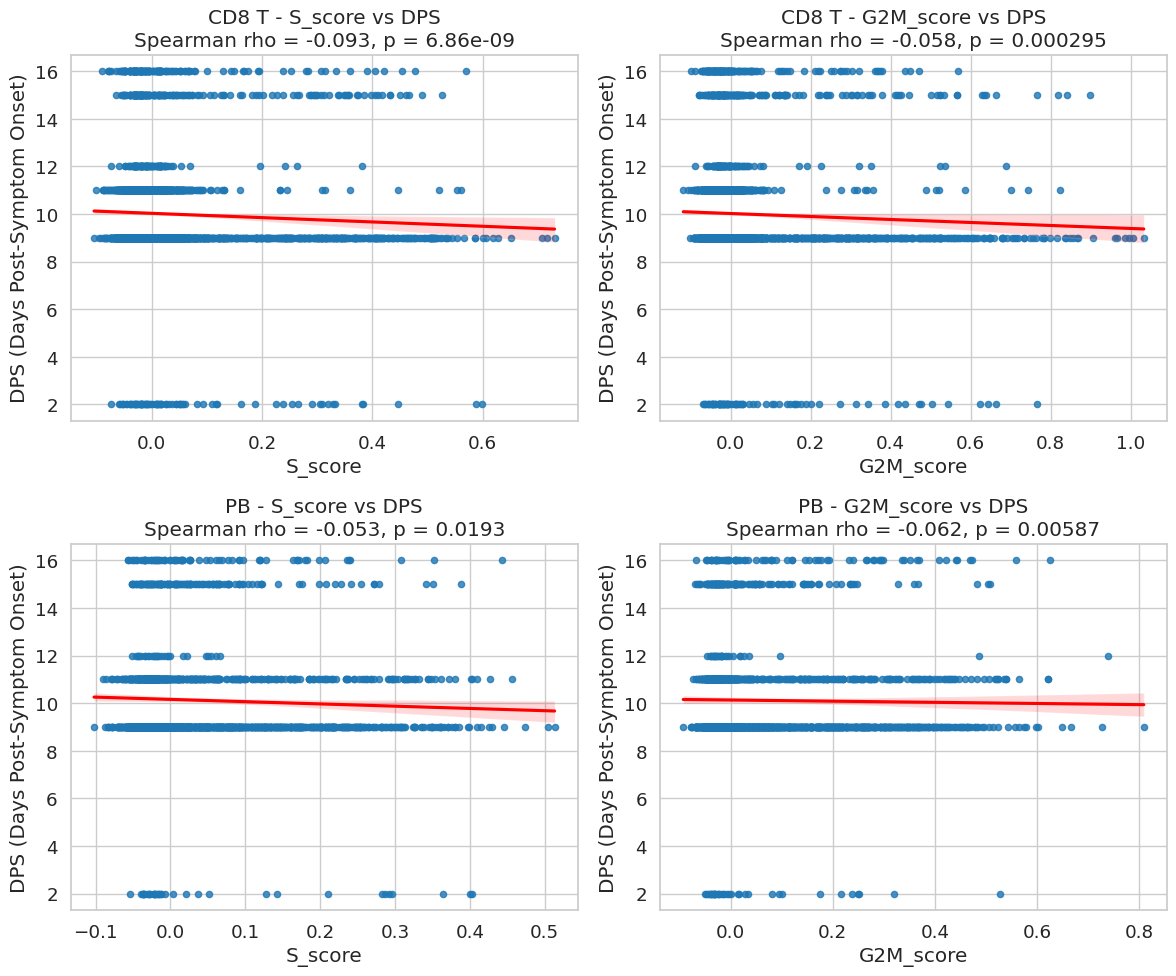

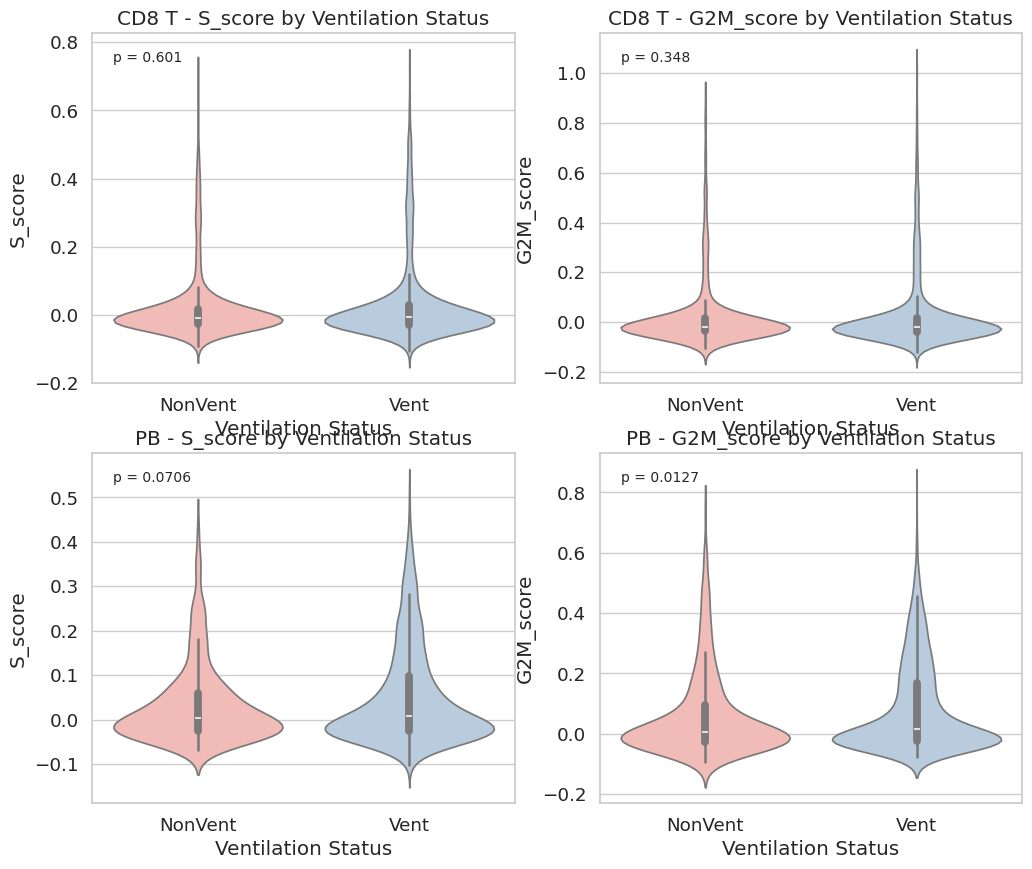


Clinical correlation analyses complete.


In [4]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, mannwhitneyu
import json

# Ensure plotting aesthetics
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8, 6)

# Step 1: Subset data for relevant cell types (CD8 T and PB) and COVID-19 samples only
cell_types_of_interest = ['CD8 T', 'PB']
adata_subset_clin = adata[adata.obs['cell_type_coarse'].isin(cell_types_of_interest) & (adata.obs['Status'] == 'COVID')].copy()

# Print the number of cells per selected cell type
print('Cell counts for selected types in COVID-19:')
print(adata_subset_clin.obs['cell_type_coarse'].value_counts())

# Initialize dictionaries to store correlation and group comparison results
correlation_results = {}
group_comparison_results = {}

# Set up grid for scatter plots: rows = cell types, columns = 2 (S_score and G2M_score)
n_celltypes = len(cell_types_of_interest)
fig_scatter, axes_scatter = plt.subplots(n_celltypes, 2, figsize=(12, 5 * n_celltypes), squeeze=False)

# Set up grid for ventilation violin plots: rows = cell types, columns = 2
fig_violin, axes_violin = plt.subplots(n_celltypes, 2, figsize=(12, 5 * n_celltypes), squeeze=False)

# Loop over each cell type
for i, cell_type in enumerate(cell_types_of_interest):
    # Subset for the current cell type
    adata_cell = adata_subset_clin[adata_subset_clin.obs['cell_type_coarse'] == cell_type].copy()
    print(f"\nAnalyzing {cell_type} (n = {adata_cell.shape[0]})")

    # Convert DPS to numeric if needed
    if 'DPS' not in adata_cell.obs.columns:
        print('DPS column not found for ' + cell_type)
        continue
    adata_cell.obs['DPS'] = pd.to_numeric(adata_cell.obs['DPS'], errors='coerce')

    # Initialize list for storing correlation results for this cell type
    correlation_results[cell_type] = []

    # Perform Spearman correlation analyses for S_score and G2M_score vs DPS
    for j, score in enumerate(['S_score', 'G2M_score']):
        # Filter out NaN values
        valid = adata_cell.obs[[score, 'DPS']].dropna()
        if valid.shape[0] < 10:
            print(f"Insufficient data for correlation analysis of {cell_type} for {score} (cells available: {valid.shape[0]})")
            axes_scatter[i, j].text(0.5, 0.5, 'Insufficient data', ha='center', va='center')
            axes_scatter[i, j].set_title(f"{cell_type} - {score}")
            continue
        x = valid[score]
        y = valid['DPS']
        rho, p_val = spearmanr(x, y, nan_policy='omit')
        correlation_results[cell_type].append({
            'score': score,
            'spearman_rho': rho,
            'p_value': p_val,
            'n_cells': valid.shape[0]
        })

        # Plot scatter with regression line on the grid
        ax_scatter = axes_scatter[i, j]
        sns.regplot(x=x, y=y, scatter_kws={'s': 20}, line_kws={'color': 'red'}, ax=ax_scatter)
        ax_scatter.set_title(f"{cell_type} - {score} vs DPS\nSpearman rho = {rho:.3f}, p = {p_val:.3g}")
        ax_scatter.set_xlabel(score)
        ax_scatter.set_ylabel('DPS (Days Post-Symptom Onset)')
        
    # Ventilation status analysis: restrict to cells with Ventilated label 'NonVent' or 'Vent'
    adata_vent = adata_cell[adata_cell.obs['Ventilated'].isin(['NonVent', 'Vent'])].copy()
    if adata_vent.shape[0] < 10:
        print(f"Insufficient data for ventilation group comparison in {cell_type}")
        # Mark both plots in the ventilation grid as insufficient
        for j in range(2):
            axes_violin[i, j].text(0.5, 0.5, 'Insufficient data', ha='center', va='center')
            axes_violin[i, j].set_title(f"{cell_type} - violin for {['S_score','G2M_score'][j]}")
        continue

    group_comparison_results[cell_type] = []
    
    # Create ventilation status violin plots for each score
    for j, score in enumerate(['S_score', 'G2M_score']):
        ax_violin = axes_violin[i, j]
        sns.violinplot(x='Ventilated', y=score, data=adata_vent.obs, palette='Pastel1', inner='box', ax=ax_violin)
        ax_violin.set_title(f"{cell_type} - {score} by Ventilation Status")
        ax_violin.set_xlabel('Ventilation Status')
        ax_violin.set_ylabel(score)

        # Extract scores for 'NonVent' and 'Vent' groups
        nonvent_scores = adata_vent.obs.loc[adata_vent.obs['Ventilated'] == 'NonVent', score].dropna()
        vent_scores = adata_vent.obs.loc[adata_vent.obs['Ventilated'] == 'Vent', score].dropna()
        
        if len(nonvent_scores) < 5 or len(vent_scores) < 5:
            print(f"Not enough cells for Mann-Whitney U test in {cell_type} for {score} (NonVent: {len(nonvent_scores)}, Vent: {len(vent_scores)})")
            continue
        stat, p_val = mannwhitneyu(nonvent_scores, vent_scores, alternative='two-sided')
        group_comparison_results[cell_type].append({
            'score': score,
            'statistic': stat,
            'p_value': p_val,
            'n_nonvent': len(nonvent_scores),
            'n_vent': len(vent_scores)
        })
        ax_violin.text(0.05, 0.95, f'p = {p_val:.3g}', transform=ax_violin.transAxes, fontsize=10,
                       verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
        
        print(f"{cell_type} - {score} by Ventilation: Mann-Whitney U statistic = {stat:.3f}, p = {p_val:.3g} (NonVent n = {len(nonvent_scores)}, Vent n = {len(vent_scores)})")

# Adjust and save the grids
fig_scatter.tight_layout()
fig_scatter.savefig('scatter_grid_DPS.png')
plt.show()

fig_violin.tight_layout()
fig_violin.savefig('violin_grid_ventilation.png')
plt.show()

# Save the statistical results as JSON files
with open('correlation_results_clinical.json', 'w') as f:
    json.dump(correlation_results, f, indent=4)

with open('ventilation_group_comparison.json', 'w') as f:
    json.dump(group_comparison_results, f, indent=4)

print('\nClinical correlation analyses complete.')


## 1. Verify that the 'G2M_score' column exists in the anndata object and review its summary statistics to ensure that the scores are normalized.

G2M_score summary statistics:
count    44721.000000
mean        -0.008368
std          0.075077
min         -0.137348
25%         -0.042596
50%         -0.023234
75%          0.003932
max          1.040768
Name: G2M_score, dtype: float64


Plasmablast counts by Ventilated status:
Ventilated
Vent       1565
NonVent     412
Name: count, dtype: int64
ranking genes


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


Top differential genes in Ventilated vs NonVentilated plasmablasts:
    names    scores  logfoldchanges         pvals     pvals_adj
0  FAM46C  8.959259        0.760756  3.268681e-19  1.397640e-15
1    PIM2  8.821082        1.008474  1.133586e-18  3.735309e-15
2    CANX  8.531198        0.640865  1.448401e-17  4.242366e-14
3    IGHM  8.156342        1.334116  3.453256e-16  9.103127e-13
4   IGHG4  7.990375        1.538594  1.345296e-15  3.223940e-12
Correlation results of top DE genes with G2M_score:
{'gene': 'FAM46C', 'spearman_rho': -0.05999117417691892, 'p_value': 0.0076274311985147}
{'gene': 'PIM2', 'spearman_rho': -0.0431820249327421, 'p_value': 0.05489533676655359}
{'gene': 'CANX', 'spearman_rho': 0.2955093109590783, 'p_value': 3.918436541849974e-41}
{'gene': 'IGHM', 'spearman_rho': 0.06534467016786806, 'p_value': 0.00365240003583468}
{'gene': 'IGHG4', 'spearman_rho': 0.1122905078445641, 'p_value': 5.571559973786158e-07}
{'gene': 'XBP1', 'spearman_rho': 0.047714186689214164, 'p_val

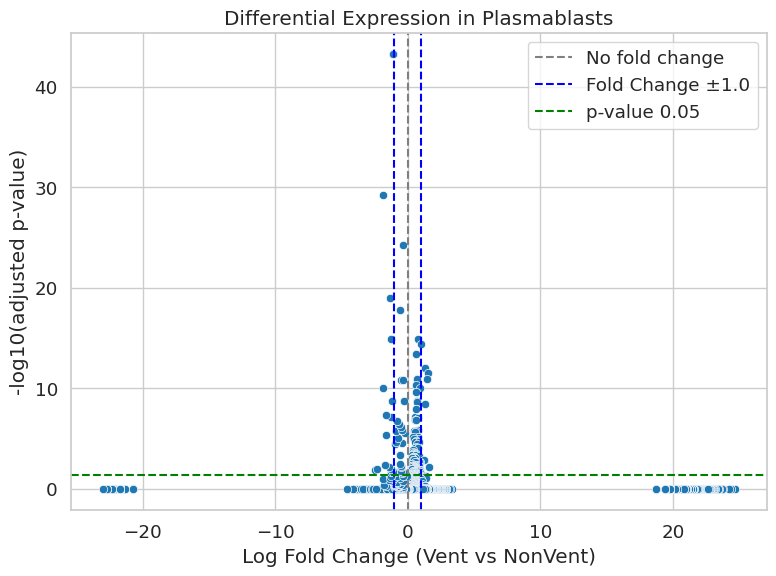

Differential expression and correlation analysis complete.


In [5]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import json

# Verify that 'G2M_score' column exists and is normalized (basic check: print summary statistics)
if 'G2M_score' not in adata.obs.columns:
    raise ValueError("G2M_score column not found in adata.obs. Compute cell cycle scores before running this analysis.")
else:
    print("G2M_score summary statistics:")
    print(adata.obs['G2M_score'].describe())

# Step 2: Subset the anndata object for Plasmablasts (PB) in COVID-19 samples
adata_pb = adata[(adata.obs['cell_type_coarse'] == 'PB') & (adata.obs['Status'] == 'COVID')].copy()

# Print the cell counts by Ventilated status for quality control
print('Plasmablast counts by Ventilated status:')
print(adata_pb.obs['Ventilated'].value_counts())

# Further subset into Vent and NonVent groups
adata_pb_vent = adata_pb[adata_pb.obs['Ventilated'] == 'Vent']
adata_pb_nonvent = adata_pb[adata_pb.obs['Ventilated'] == 'NonVent']

if adata_pb_vent.shape[0] < 10 or adata_pb_nonvent.shape[0] < 10:
    print('Insufficient cell counts in one of the groups (Vent or NonVent) for robust differential expression analysis.')
else:
    # Create a new column for group labeling
    adata_pb.obs['vent_group'] = adata_pb.obs['Ventilated']

    # Perform differential gene expression analysis comparing Vent (test group) vs NonVent (reference) using Wilcoxon test
    sc.tl.rank_genes_groups(adata_pb, groupby='vent_group', groups=['Vent'], reference='NonVent', method='wilcoxon')

    # Extract the top differentially expressed genes into a dataframe
    de_results = sc.get.rank_genes_groups_df(adata_pb, group='Vent')
    print('Top differential genes in Ventilated vs NonVentilated plasmablasts:')
    print(de_results.head())

    # Select the top 10 DE genes for correlation analysis
    top_genes = de_results['names'].head(10).tolist()
    corr_results = []
    for gene in top_genes:
        if gene in adata_pb.var_names:
            # Get gene expression; handle sparse matrices
            expr = adata_pb[:, gene].X
            if hasattr(expr, 'toarray'):
                expr = expr.toarray().flatten()
            else:
                expr = np.array(expr).flatten()
            # Ensure sufficient valid data
            valid_idx = (~np.isnan(expr)) & (~np.isnan(adata_pb.obs['G2M_score'].values))
            if valid_idx.sum() > 10:
                rho, p_val = spearmanr(expr[valid_idx], adata_pb.obs['G2M_score'].values[valid_idx])
                corr_results.append({
                    'gene': gene,
                    'spearman_rho': rho,
                    'p_value': p_val
                })
    print('Correlation results of top DE genes with G2M_score:')
    for res in corr_results:
        print(res)

    # Visualization: Volcano plot-like scatter plot for DGE results
    plt.figure(figsize=(8,6))
    # Create a column -log10(p-value) for visualization; add a small constant to avoid log(0)
    de_results['-log10_p'] = -np.log10(de_results['pvals_adj'] + 1e-300)
    sns.scatterplot(data=de_results, x='logfoldchanges', y='-log10_p')
    plt.axvline(x=0, color='gray', linestyle='--', label='No fold change')  # reference line for zero fold change
    # Add threshold reference lines: example thresholds for fold change and p-value
    fold_change_threshold = 1.0
    pval_threshold = -np.log10(0.05)
    plt.axvline(x=fold_change_threshold, color='blue', linestyle='--', label=f'Fold Change ±{fold_change_threshold}')
    plt.axvline(x=-fold_change_threshold, color='blue', linestyle='--')
    plt.axhline(y=pval_threshold, color='green', linestyle='--', label='p-value 0.05')
    plt.xlabel('Log Fold Change (Vent vs NonVent)')
    plt.ylabel('-log10(adjusted p-value)')
    plt.title('Differential Expression in Plasmablasts')
    plt.legend()
    plt.tight_layout()
    plt.savefig('PB_DE_volcano.png')
    plt.show()

    # Save DE and correlation results to a JSON file for record
    results = {
        'de_results': de_results.head(10).to_dict(orient='records'),
        'correlation_results': corr_results
    }
    with open('PB_DE_correlation_results.json', 'w') as f:
        json.dump(results, f, indent=4)
    print('Differential expression and correlation analysis complete.')

## Subset the anndata object to extract CD14 monocytes and T cells (both CD4 T and CD8 T) for COVID versus Healthy samples, while ensuring a minimum number of cells per subtype to support robust statistical testing.

Monocyte ligand genes available: ['TNF', 'IL1B', 'IL6']
T cell receptor genes available: ['TNFRSF1A', 'IL1R1', 'IL6R']
Monocytes - TNF: COVID group has 8285 cells.
Monocytes - TNF: Healthy group has 2054 cells.
Monocytes - TNF: Mann-Whitney U test completed with p-value = 5.52e-09
Monocytes - IL1B: COVID group has 8285 cells.
Monocytes - IL1B: Healthy group has 2054 cells.
Monocytes - IL1B: Mann-Whitney U test completed with p-value = 3.42e-06
Monocytes - IL6: COVID group has 8285 cells.
Monocytes - IL6: Healthy group has 2054 cells.
Monocytes - IL6: Mann-Whitney U test completed with p-value = 0.00727


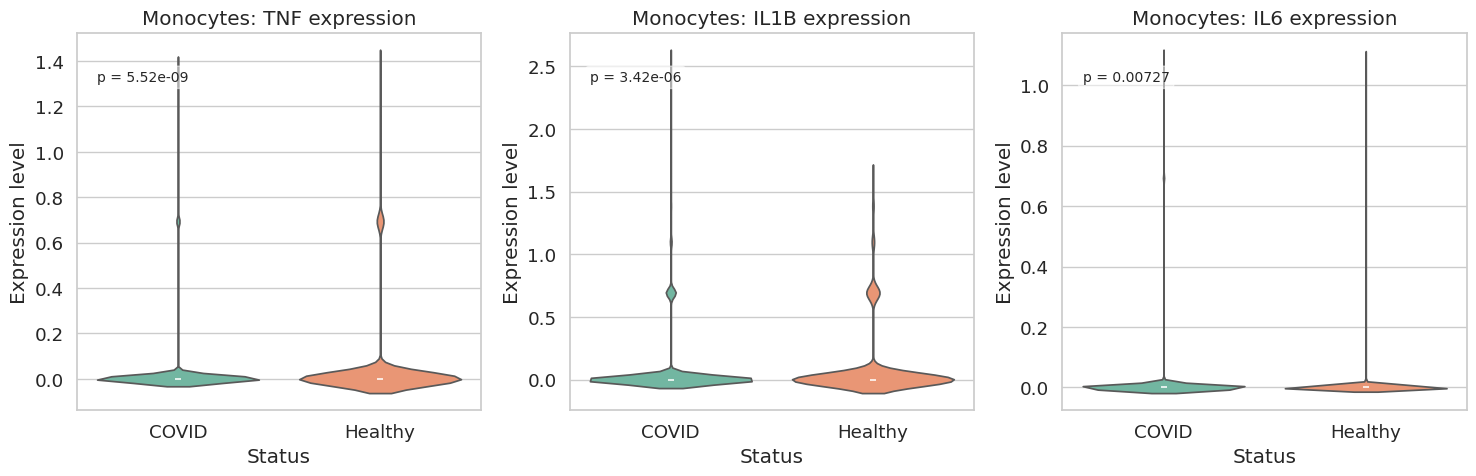

T cells - TNFRSF1A: COVID group has 9439 cells.
T cells - TNFRSF1A: Healthy group has 5720 cells.
T cells - TNFRSF1A: Mann-Whitney U test completed with p-value = 1.59e-07
T cells - IL1R1: COVID group has 9439 cells.
T cells - IL1R1: Healthy group has 5720 cells.
T cells - IL1R1: Mann-Whitney U test completed with p-value = 0.00941
T cells - IL6R: COVID group has 9439 cells.
T cells - IL6R: Healthy group has 5720 cells.
T cells - IL6R: Mann-Whitney U test completed with p-value = 0.146


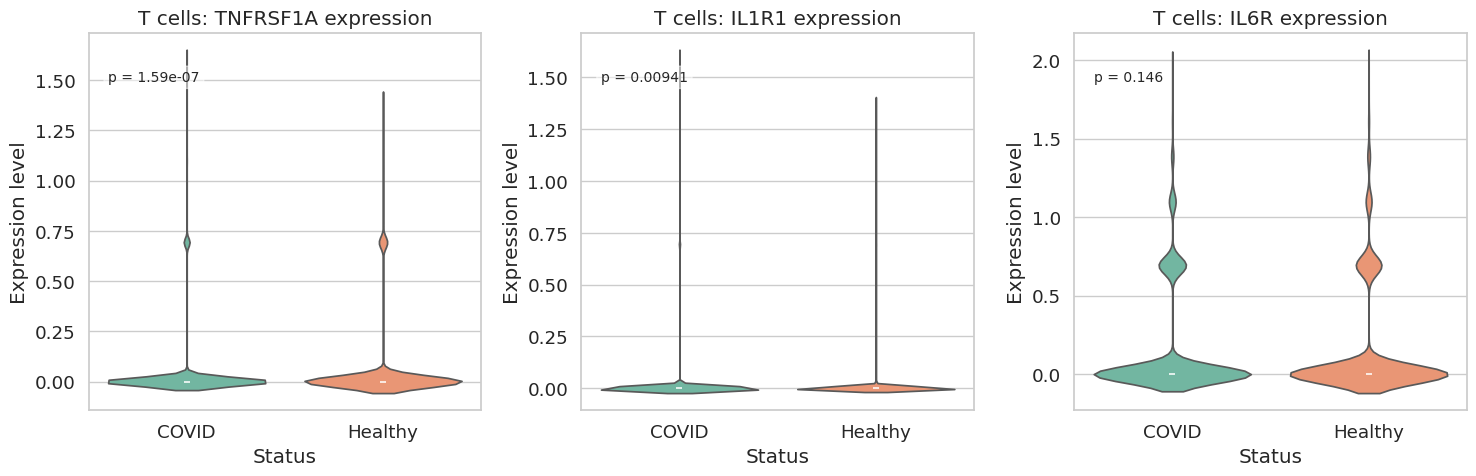

Ligand-receptor expression analysis complete.


In [6]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu

# Define key ligand and receptor genes
ligand_genes = ['TNF', 'IL1B', 'IL6']
receptor_genes = ['TNFRSF1A', 'IL1R1', 'IL6R']

# Subset the anndata object for monocytes and T cells
monocytes = adata[adata.obs['cell_type_coarse'] == 'CD14 Monocyte'].copy()
t_cells = adata[adata.obs['cell_type_coarse'].isin(['CD4 T', 'CD8 T'])].copy()

# Check for sufficient cell numbers in each subset
min_cells_threshold = 20
if monocytes.n_obs < min_cells_threshold:
    print(f"Warning: Only {monocytes.n_obs} monocytes found. Statistical tests may be unstable.")
if t_cells.n_obs < min_cells_threshold:
    print(f"Warning: Only {t_cells.n_obs} T cells found. Statistical tests may be unstable.")

# Verify that each gene is present in the respective dataset; if missing, print a warning
present_ligands = []
missing_ligands = []
for gene in ligand_genes:
    if gene in monocytes.var_names:
        present_ligands.append(gene)
    else:
        missing_ligands.append(gene)

present_receptors = []
missing_receptors = []
for gene in receptor_genes:
    if gene in t_cells.var_names:
        present_receptors.append(gene)
    else:
        missing_receptors.append(gene)

if missing_ligands:
    print(f"Warning: The following ligand genes are missing in monocytes: {missing_ligands}")
if missing_receptors:
    print(f"Warning: The following receptor genes are missing in T cells: {missing_receptors}")

print('Monocyte ligand genes available:', present_ligands)
print('T cell receptor genes available:', present_receptors)

# Define a helper function to plot gene expression and perform Mann-Whitney U test

def plot_gene_expression(data, gene, cell_group, group_col, ax, order=["COVID", "Healthy"]):
    # Check if gene exists
    if gene not in data.var_names:
        ax.text(0.5, 0.5, f'{gene} not found', ha='center', va='center')
        ax.set_title(f'{cell_group}: {gene}')
        return
    
    # Extract expression values (handling sparse data if necessary)
    expr = data[:, gene].X
    if hasattr(expr, 'toarray'):
        expr = expr.toarray().flatten()
    else:
        expr = np.array(expr).flatten()
    
    # Create a DataFrame for plotting and statistical testing
    df = pd.DataFrame({
        'expression': expr,
        group_col: data.obs[group_col].values
    })

    # Log sample sizes for both groups
    for grp in order:
        n_grp = df[df[group_col] == grp].shape[0]
        print(f"{cell_group} - {gene}: {grp} group has {n_grp} cells.")

    # Create a violin plot with explicitly defined order
    sns.violinplot(x=group_col, y='expression', data=df, palette='Set2', inner='box', ax=ax, order=order)
    ax.set_title(f'{cell_group}: {gene} expression')
    ax.set_ylabel('Expression level')

    # Check that there are exactly two groups
    groups = df[group_col].unique()
    if len(groups) == 2:
        # Use the explicit ordering to extract groups
        group1 = df[df[group_col] == order[0]]['expression']
        group2 = df[df[group_col] == order[1]]['expression']
        # Only perform test if both groups have more than 5 cells
        if group1.shape[0] > 5 and group2.shape[0] > 5:
            stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided')
            ax.text(0.05, 0.90, f'p = {p_val:.3g}', transform=ax.transAxes, fontsize=10,
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
            print(f'{cell_group} - {gene}: Mann-Whitney U test completed with p-value = {p_val:.3g}')
        else:
            print(f'Insufficient cell counts in one of the groups for gene {gene} in {cell_group}')

# Plot expression for monocyte ligand genes
n_ligands = len(present_ligands)
if n_ligands > 0:
    fig1, axes1 = plt.subplots(1, n_ligands, figsize=(5*n_ligands, 5))
    if n_ligands == 1:
        axes1 = [axes1]
    for i, gene in enumerate(present_ligands):
        plot_gene_expression(monocytes, gene, 'Monocytes', 'Status', axes1[i])
    fig1.tight_layout()
    plt.savefig('monocyte_ligand_expression.png')
    plt.show()
else:
    print('No ligand genes available in monocytes for plotting.')

# Plot expression for T cell receptor genes
n_receptors = len(present_receptors)
if n_receptors > 0:
    fig2, axes2 = plt.subplots(1, n_receptors, figsize=(5*n_receptors, 5))
    if n_receptors == 1:
        axes2 = [axes2]
    for i, gene in enumerate(present_receptors):
        plot_gene_expression(t_cells, gene, 'T cells', 'Status', axes2[i])
    fig2.tight_layout()
    plt.savefig('Tcell_receptor_expression.png')
    plt.show()
else:
    print('No receptor genes available in T cells for plotting.')

print('Ligand-receptor expression analysis complete.')


## Subset the anndata object to extract T cells (CD4 T and CD8 T) and plasmablasts (PB), further stratifying by condition (COVID vs Healthy) based on the 'Status' column.

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Subset the anndata object for T cells (CD4 T and CD8 T) and Plasmablasts (PB), stratifying by condition using 'Status'
all_t_cells = adata[adata.obs['cell_type_coarse'].isin(['CD4 T', 'CD8 T'])].copy()
pb_cells = adata[adata.obs['cell_type_coarse'] == 'PB'].copy()

# Ensure that required cell cycle score columns exist and are numeric
required_scores = ['S_score', 'G2M_score']
for score in required_scores:
    if score not in adata.obs.columns:
        raise ValueError(f"{score} not found in adata.obs. Please compute cell cycle scores before running this analysis.")
    if not pd.api.types.is_numeric_dtype(adata.obs[score]):
        adata.obs[score] = pd.to_numeric(adata.obs[score], errors='coerce')

# Define conditions
conditions = ['COVID', 'Healthy']

# Analysis for T cells: For each condition, correlate IL6R expression with cell cycle scores
for condition in conditions:
    t_cells = all_t_cells[all_t_cells.obs['Status'] == condition].copy()
    print(f"\nAnalyzing T cells for condition: {condition} (n = {t_cells.n_obs})")
    
    if 'IL6R' not in t_cells.var_names:
        print(f"Warning: IL6R gene not found in T cells for condition {condition}. Skipping IL6R correlation analysis.")
        continue
    
    # Extract IL6R expression and convert to dense if necessary
    il6r_expr = t_cells[:, 'IL6R'].X
    if hasattr(il6r_expr, 'toarray'):
        il6r_expr = il6r_expr.toarray().flatten()
    else:
        il6r_expr = np.array(il6r_expr).flatten()
    
    for score in required_scores:
        # Ensure the score values are numeric
        scores = pd.to_numeric(t_cells.obs[score].values, errors='coerce')
        valid = ~np.isnan(scores) & ~np.isnan(il6r_expr)
        if valid.sum() < 10:
            print(f"Insufficient valid cells for correlation of IL6R with {score} in T cells for condition {condition}.")
            continue
        rho, p_val = spearmanr(il6r_expr[valid], scores[valid])
        print(f"T cells ({condition}): Spearman correlation between IL6R and {score}: rho = {rho:.3f}, p = {p_val:.3g}")
        
        # Generate scatter plot for IL6R expression versus the cell cycle score
        plt.figure(figsize=(6,5))
        plt.scatter(il6r_expr[valid], scores[valid], alpha=0.6, color='teal')
        plt.xlabel("IL6R Expression")
        plt.ylabel(score)
        plt.title(f"T cells ({condition}): IL6R vs {score}\nSpearman rho = {rho:.3f}, p = {p_val:.3g}")
        plt.tight_layout()
        plt.savefig(f"t_cells_{condition}_IL6R_vs_{score}.png")
        plt.show()

# Comparative analysis: Generate violin plots of cell cycle scores by condition for T cells and PB cells
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, (cell_group, data) in enumerate([('T cells', all_t_cells), ('Plasmablasts', pb_cells)]):
    for j, score in enumerate(required_scores):
        sns.violinplot(x='Status', y=score, data=data.obs, palette='Set2', inner='box', ax=axes[i, j], order=['COVID', 'Healthy'])
        axes[i, j].set_title(f"{cell_group}: {score} by Status")
        axes[i, j].set_xlabel("Status")
        axes[i, j].set_ylabel(score)

plt.tight_layout()
plt.savefig("cell_cycle_violin_Tcells_PB.png")
plt.show()

print("Step 1 analysis complete: Subsetting by cell type and condition, IL6R-cell cycle correlations, and cell cycle score comparisons have been executed.")